For the path to the images i did make some changes. So in each folder (1,2,3) i removed all the partitions and just placed all the images in the corresponding folder. So there are no partition folders.

In [1]:
import pandas as pd
import cv2
import os
import imageio as iio
import matplotlib.pyplot as plt
from imageai.Detection import ObjectDetection
import numpy as np 
import time

c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
fitness = []
podium = []
looppiste = []
cameras = ["1 Oude Fitness", "2 De nayer (Podium)", "3 De nayer (Loop piste)"]
dataframe = pd.read_csv("swarmIoT_full_labeled_dataset.csv")
for i in range(len(dataframe)):
    item = dataframe.iloc[i]["image"]
    img_string = item
    if "-" in item:
        img_string = item.split("-")[1]
    img_id = img_string.split(".")[0] 
    for camera in cameras:
        filepath = f"D:\\School\\Academiejaar 3\\Semester 1\\data en ai\\data computer vision assignment\\data computer vision assignment\\{camera}\\{img_string}"
        if os.path.exists(filepath):
            img = plt.imread(filepath)
            img = cv2.resize(img, (416,416))
            img_obj = {"id":img_id,"image": img}
            if camera == "1 Oude Fitness":
                fitness.append(img_obj)
            elif camera == "2 De nayer (Podium)":
                podium.append(img_obj)
            else:
                looppiste.append(img_obj)

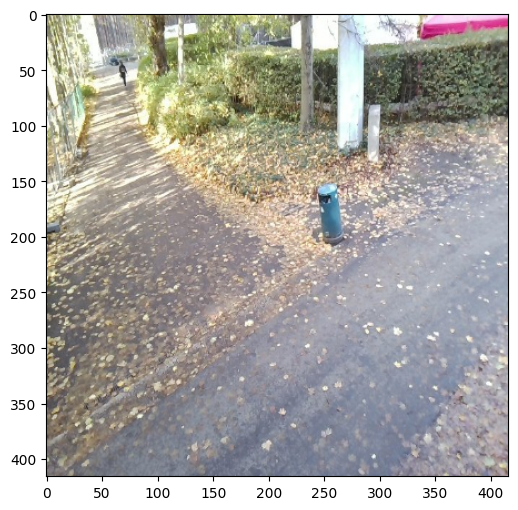

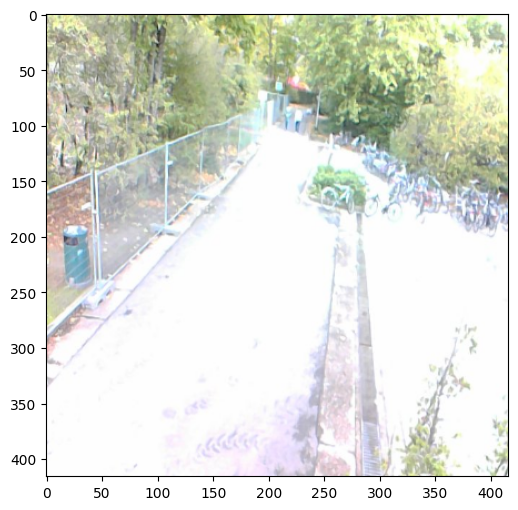

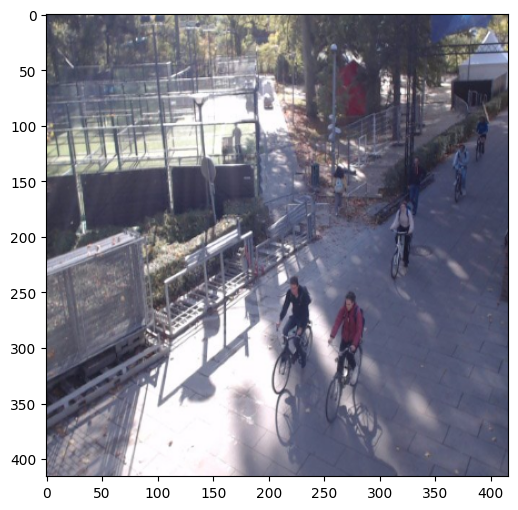

In [3]:

for idx,i in enumerate(looppiste):
    if idx == 1:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
        ax.imshow(i["image"])

for idx,i in enumerate(podium):
    if idx == 1:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
        ax.imshow(i["image"])
for idx,i in enumerate(fitness):
    if idx == 1:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
        ax.imshow(i["image"])
    

In [4]:
classes = open('coco.names').read().strip().split('\n')
classes

C:\Users\david\AppData\Local\Temp\ipykernel_26984\3899181129.py:1: ResourceWarning: unclosed file <_io.TextIOWrapper name='coco.names' mode='r' encoding='cp1252'>
  classes = open('coco.names').read().strip().split('\n')


['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [5]:
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

In [6]:
net = cv2.dnn.readNetFromDarknet('YOLO/yolov3.cfg', 'YOLO/yolov3.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)

In [7]:
ln = net.getLayerNames()
outNames = net.getUnconnectedOutLayersNames()

In [8]:
def detect_images(images):
    output_images = []
    for img in images:
        blob = cv2.dnn.blobFromImage(img["image"], 1/255.0, (416, 416), crop=False)
        boxes = []
        confidences = []
        classIDs = []
        confTreshHold = 0.5
        blob.shape
        net.setInput(blob)
        outputs = net.forward(outNames)
        outputs = np.vstack(outputs)
        h, w = img["image"].shape[:2]
        for output in outputs:
                scores = output[5:]
                classID = np.argmax(scores)
                confidence = scores[classID]
                if confidence > confTreshHold:
                    box = output[:4] * np.array([w, h, w, h])
                    (centerX, centerY, width, height) = box.astype("int")
                    x = int(centerX - (width / 2))
                    y = int(centerY - (height / 2))
                    box = [x, y, int(width), int(height)]
                    boxes.append(box)
                    confidences.append(float(confidence))
                    classIDs.append(classID)

        indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
        num_persons= 0
        if len(indices) > 0:
            for i in indices.flatten():
                (x, y) = (boxes[i][0], boxes[i][1])
                (w, h) = (boxes[i][2], boxes[i][3])
                color = [int(c) for c in colors[classIDs[i]]]
                cv2.rectangle(img["image"], (x, y), (x + w, y + h), color, 1)
                text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
                if classes[classIDs[i]] == "person":
                    num_persons += 1
                cv2.putText(img["image"], text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.25, color, 1)
            img["persons"] = num_persons
            output_images.append(img)         
    return output_images
    

looppiste_detected = detect_images(looppiste)
podium_detected = detect_images(podium)
fitness_detected = detect_images(fitness)


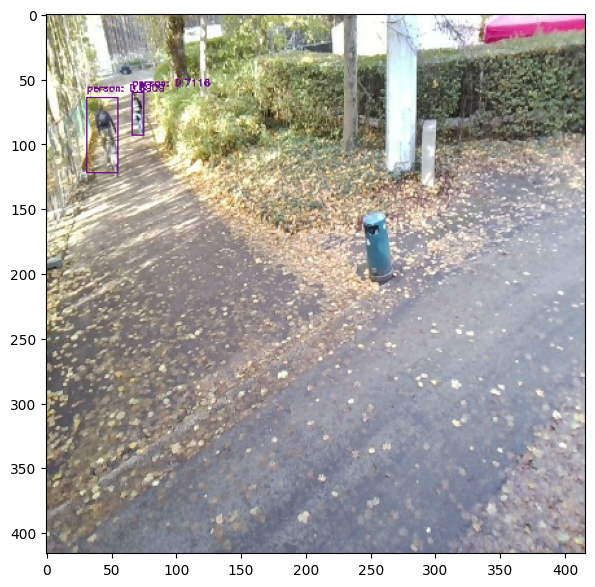

In [9]:
for idx,img in enumerate(looppiste):
    if idx == 0:
        fig, ax = plt.subplots(figsize=(7,7))
        ax.imshow(img["image"])
# for idx,img in enumerate(podium_detected):
#     if idx == 99:
#         fig, ax = plt.subplots(figsize=(7,7))
#         ax.imshow(img["image"])
# for idx,img in enumerate(fitness_detected):
#     if idx == 99:
#         fig, ax = plt.subplots(figsize=(7,7))
#         ax.imshow(img["image"])

In [17]:
MUCH = 4
SMALL = 1
def get_accuracy(images):
    predicted_list = []
    correctly_predicted = 0
    for idx,img in enumerate(images):
        correct = True
        labeled = dataframe.loc[dataframe["image"].str.contains(img["id"])]["choice"].values[0]
        if labeled != None:
            predicted = img["persons"]
            predicted_list.append(predicted)
            if labeled == 2 and predicted < MUCH:
                correct =  False
            if labeled == 1 and predicted < SMALL:
                correct = False
            if labeled == 0 and predicted != 0:
                correct = False
            if correct:
                correctly_predicted +=1
    return correctly_predicted/len(images)
looppiste_accuracy = get_accuracy(looppiste_detected)
podium_accuracy = get_accuracy(podium_detected)
fitness_accuracy = get_accuracy(fitness_detected)
print(f"we correctly predicted: {round(looppiste_accuracy,3)*100}% of the looppiste dataset")
print(f"we correctly predicted: {round(podium_accuracy,3)*100}% of the podium dataset")
print(f"we correctly predicted: {round(fitness_accuracy,3)*100}% of the fitness dataset")


we correctly predicted: 93.4% of the looppiste dataset
we correctly predicted: 87.5% of the podium dataset
we correctly predicted: 83.8% of the fitness dataset
SUUUUUUUUIIIIIIIIIIIIIII
